## Import the required libraries

In [4]:
import pandas as pd
import matplotlib.pyplot as pyplot
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Task 1: Become familiar with the dataset

The following describes the dataset variables:

·      CRIM - per capita crime rate by town

·      ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

·      INDUS - proportion of non-retail business acres per town.

·      CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

·      NOX - nitric oxides concentration (parts per 10 million)

·      RM - average number of rooms per dwelling

·      AGE - proportion of owner-occupied units built prior to 1940

·      DIS - weighted distances to five Boston employment centres

·      RAD - index of accessibility to radial highways

·      TAX - full-value property-tax rate per $10,000

·      PTRATIO - pupil-teacher ratio by town

·      LSTAT - % lower status of the population

·      MEDV - Median value of owner-occupied homes in $1000's



# Task 2: Generate Descriptive Statistics and Visualizations

## Read the dataset from the URL

In [7]:

boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

In [8]:
boston_df

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


## 1) For the "Median value of owner-occupied homes" provide a boxplot

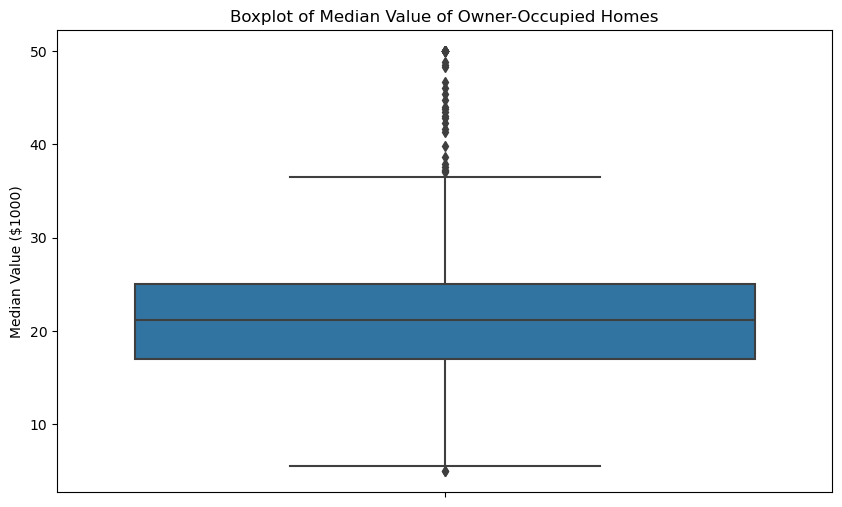

In [10]:
# Boxplot for the Median value of owner-occupied homes
pyplot.figure(figsize=(10, 6))
sns.boxplot(y='MEDV', data=boston_df)
pyplot.title('Boxplot of Median Value of Owner-Occupied Homes')
pyplot.ylabel('Median Value ($1000)')
pyplot.show()

## 2)Provide a  bar plot for the Charles river variable

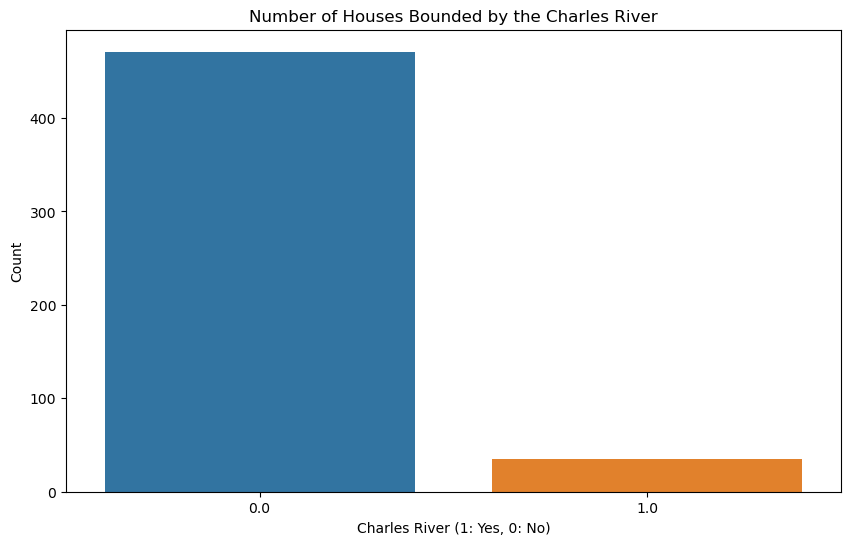

In [11]:
# Bar plot for the Charles River variable
pyplot.figure(figsize=(10, 6))
sns.countplot(x='CHAS', data=boston_df)
pyplot.title('Number of Houses Bounded by the Charles River')
pyplot.xlabel('Charles River (1: Yes, 0: No)')
pyplot.ylabel('Count')
pyplot.show()

## 3)Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

D:\OneDrive - Asghar Ali Co. WLL\Jijo Personel-2023\2024\Phyton\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


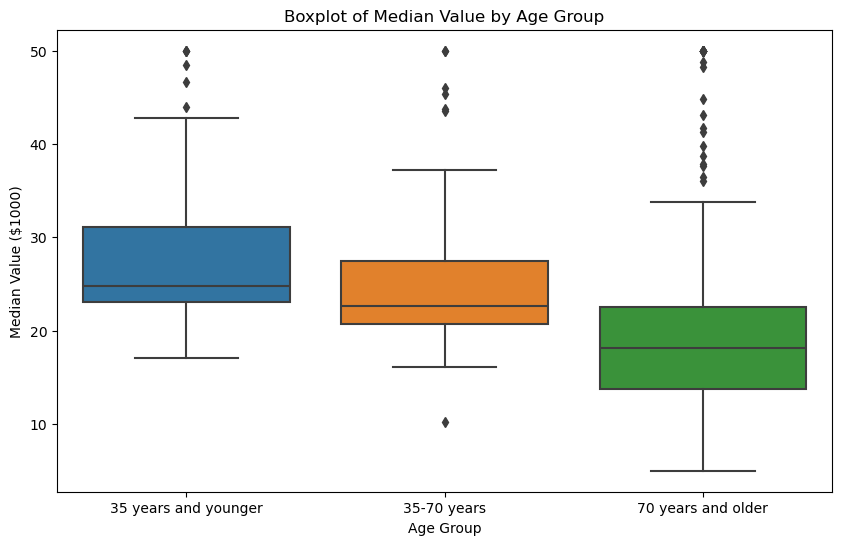

In [12]:
# Discretize AGE variable into three groups
boston_df['AGE_GROUP'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, 100], labels=['35 years and younger', '35-70 years', '70 years and older'])

# Boxplot for MEDV vs. AGE_GROUP
pyplot.figure(figsize=(10, 6))
sns.boxplot(x='AGE_GROUP', y='MEDV', data=boston_df)
pyplot.title('Boxplot of Median Value by Age Group')
pyplot.xlabel('Age Group')
pyplot.ylabel('Median Value ($1000)')
pyplot.show()

## 4) Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?


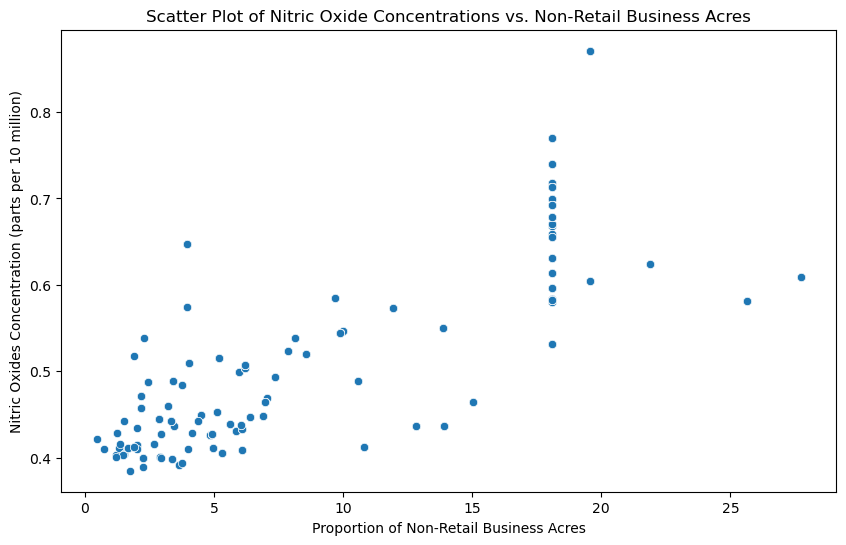

In [13]:
# Scatter plot for NOX vs. INDUS
pyplot.figure(figsize=(10, 6))
sns.scatterplot(x='INDUS', y='NOX', data=boston_df)
pyplot.title('Scatter Plot of Nitric Oxide Concentrations vs. Non-Retail Business Acres')
pyplot.xlabel('Proportion of Non-Retail Business Acres')
pyplot.ylabel('Nitric Oxides Concentration (parts per 10 million)')
pyplot.show()

## 5) Create a histogram for the pupil to teacher ratio variable

D:\OneDrive - Asghar Ali Co. WLL\Jijo Personel-2023\2024\Phyton\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


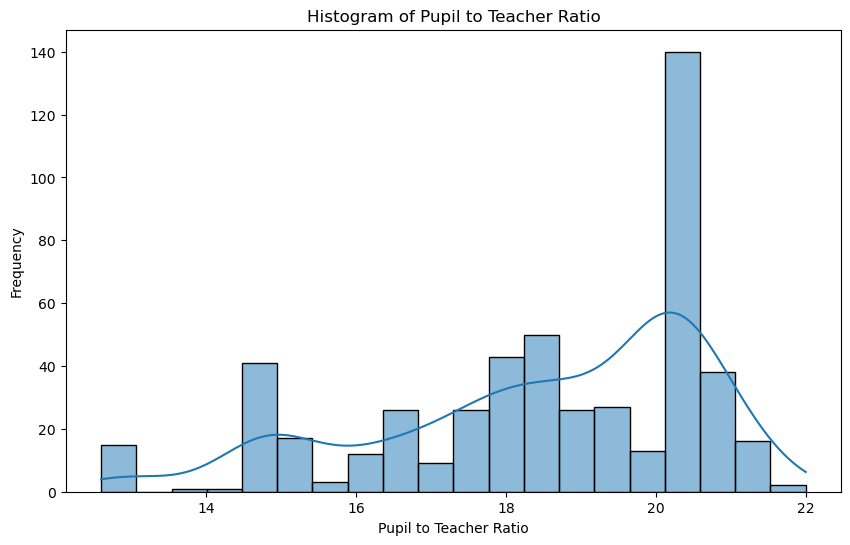

In [9]:
# Histogram for Pupil to Teacher Ratio
pyplot.figure(figsize=(10, 6))
sns.histplot(boston_df['PTRATIO'], bins=20, kde=True)
pyplot.title('Histogram of Pupil to Teacher Ratio')
pyplot.xlabel('Pupil to Teacher Ratio')
pyplot.ylabel('Frequency')
pyplot.show()

# Task 3 - Use the appropriate tests to answer the questions provided

#### For each of the following questions;
A. Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

B. Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

C. Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

D. What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

## Hypothesis Testing

### Let's address the four specific questions with hypothesis testing.

### A-Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

### Hypothesis:

Null Hypothesis (H0): There is no significant difference in the median value of houses bounded by the Charles River (CHAS). 
Alternative Hypothesis (H1): There is a significant difference in the median value of houses bounded by the Charles River

In [16]:
# T-test for independent samples
chas_0 = boston_df[boston_df['CHAS'] == 0]['MEDV']
chas_1 = boston_df[boston_df['CHAS'] == 1]['MEDV']

t_stat, p_value = scipy.stats.ttest_ind(chas_0, chas_1)

print(f"T-statistic: {t_stat}, P-value: {p_value}")

if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference in the median value of houses bounded by the Charles River.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in the median value of houses bounded by the Charles River.")

T-statistic: -3.996437466090509, P-value: 7.390623170519905e-05
Reject the null hypothesis: There is a significant difference in the median value of houses bounded by the Charles River.


### Answer to A: There is a significant difference in the median value of houses bounded by the Charles River.

## B. Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

### Hypothesis:

Null Hypothesis (H0): There is no difference in the median values of houses for each proportion of owner-occupied units built prior to 1940.
Alternative Hypothesis (H1): There is a difference in the median values of houses for each proportion of owner-occupied units built prior to 1940.

In [18]:
# ANOVA test
anova_result = ols('MEDV ~ AGE_GROUP', data=boston_df).fit()
anova_table = sm.stats.anova_lm(anova_result, typ=2)

print(anova_table)

if anova_table['PR(>F)'][0] < 0.05:
    print("Reject the null hypothesis: There is a significant difference in the median values of houses for different age groups.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in the median values of houses for different age groups.")

                 sum_sq     df         F        PR(>F)
AGE_GROUP   5401.731883    2.0  36.40765  1.710501e-15
Residual   37314.563532  503.0       NaN           NaN
Reject the null hypothesis: There is a significant difference in the median values of houses for different age groups.


C:\Users\Jijo\AppData\Local\Temp\ipykernel_25880\1358459496.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if anova_table['PR(>F)'][0] < 0.05:


### Answer to B: There is a significant difference in the median values of houses for different age groups.

## C. Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

### Hypothesis:

Null Hypothesis (H0): There is no relationship between nitric oxide concentrations and the proportion of non-retail business acres per town. Alternative Hypothesis (H1): There is a relationship between nitric oxide concentrations and the proportion of non-retail business acres per town.

In [19]:

# Pearson correlation
correlation, p_value = scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

print(f"Correlation: {correlation}, P-value: {p_value}")

if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant relationship between nitric oxide concentrations and non-retail business acres.")
else:
    print("Fail to reject the null hypothesis: There is no significant relationship between nitric oxide concentrations and non-retail business acres.")

Correlation: 0.763651446920915, P-value: 7.913361061241167e-98
Reject the null hypothesis: There is a significant relationship between nitric oxide concentrations and non-retail business acres.


### Answer to C: There is a significant relationship between nitric oxide concentrations and non-retail business acres

## D. What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

### Hypothesis:

Null Hypothesis (H0): The weighted distance to five Boston employment centers does not impact the median value of owner-occupied homes. Alternative Hypothesis (H1): The weighted distance to five Boston employment centers impacts the median value of owner-occupied homes

In [20]:

# Regression analysis
X = boston_df['DIS']
Y = boston_df['MEDV']

X = sm.add_constant(X)  # Add constant term to predictor

model = sm.OLS(Y, X).fit()
predictions = model.predict(X)

print(model.summary())

if model.pvalues[1] < 0.05:
    print("Reject the null hypothesis: The weighted distance to employment centers impacts the median value of owner-occupied homes.")
else:
    print("Fail to reject the null hypothesis: The weighted distance to employment centers does not impact the median value of owner-occupied homes.")

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Fri, 14 Jun 2024   Prob (F-statistic):           1.21e-08
Time:                        14:54:12   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0

C:\Users\Jijo\AppData\Local\Temp\ipykernel_25880\663477366.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if model.pvalues[1] < 0.05:


### Answer to D: From the results above, Coefficient for DIS is 1.0916, which indicates that for each additional unit increase in the weighted distance to the five Boston employment centers, the median value of owner-occupied homes increases by approximately $1,091.60.